In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from feature_engine.encoding import DecisionTreeEncoder
from sklearn.linear_model import LinearRegression
from feature_engine.encoding import RareLabelEncoder
from feature_engine.encoding import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from matplotlib import pyplot as plt
import joblib

## Load the dataset and make sure it's clean before training the models

In [2]:
# Load the clean dataset
clean_data_df = pd.read_csv("Resource/clean_data.csv")
clean_data_df

,LotArea,LotShape,BldgType,YearBuilt,Neighborhood,YearRemodAdd,Heating,TtlHouseSF,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageCars,PavedDrive,PoolArea,MoSold,YrSold,SalePrice
0,8450,Reg,1Fam,2003,College Creek,2003,GasA,2566,2,1,3,F,Attchd,2,Y,F,2,2008,208500
1,11250,IR1,1Fam,2001,College Creek,2002,GasA,2706,2,1,3,T,Attchd,2,Y,F,9,2008,223500
2,10652,IR1,1Fam,2006,College Creek,2007,GasA,2988,2,0,3,T,Attchd,3,Y,F,8,2007,279500
3,9742,Reg,1Fam,2002,College Creek,2002,GasA,3572,2,0,3,T,Attchd,2,Y,F,9,2008,230000
4,11049,Reg,1Fam,2007,College Creek,2007,GasA,2468,2,0,3,F,Attchd,2,Y,F,1,2008,179900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,9842,Reg,1Fam,1921,South & West of Iowa State University,1998,GasA,3213,3,1,4,F,BuiltIn,2,Y,F,5,2008,189000
1147,6292,Reg,1Fam,1930,South & West of Iowa State University,1950,GasA,1558,1,0,2,F,Detchd,1,Y,F,4,2008,91000
1148,6171,Reg,1Fam,1925,South & West of Iowa State University,1990,GasA,2584,2,1,3,T,Detchd,1,Y,F,10,2009,137450
1149,1950,Reg,Twnhs,1980,Bluestem,1980,GasA,2272,2,1,3,T,Attchd,2,Y,F,7,2008,151000


In [3]:
# Make sure the dataframe has no null values
print(clean_data_df.isnull().sum())
clean_data_df.dropna(inplace=True)
clean_data_df.fillna(clean_data_df.mean(), inplace=True)
print(clean_data_df.isnull().sum())

LotArea         0
LotShape        0
BldgType        0
YearBuilt       0
Neighborhood    0
YearRemodAdd    0
Heating         0
TtlHouseSF      0
FullBath        0
HalfBath        0
BedroomAbvGr    0
Fireplaces      0
GarageType      0
GarageCars      0
PavedDrive      0
PoolArea        0
MoSold          0
YrSold          0
SalePrice       0
dtype: int64
LotArea         0
LotShape        0
BldgType        0
YearBuilt       0
Neighborhood    0
YearRemodAdd    0
Heating         0
TtlHouseSF      0
FullBath        0
HalfBath        0
BedroomAbvGr    0
Fireplaces      0
GarageType      0
GarageCars      0
PavedDrive      0
PoolArea        0
MoSold          0
YrSold          0
SalePrice       0
dtype: int64


C:\Users\phuong\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


## Split the dataset into training and testing sets and convert categorical values to numeric values

In [4]:
# Split the data into features and target variable
X = clean_data_df.drop("SalePrice", axis=1)
y = clean_data_df["SalePrice"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [5]:
# Make sure datasets have the same number of elements
print(clean_data_df.shape[0]) 
print(X_train.shape[0])
print(y_train.shape[0])
print(X_test.shape[0])
print(y_test.shape[0])

1151
920
920
231
231


In [6]:
# Define a list of categorical features to convert categorical values to numeric values
cat_features = ['LotShape', 'BldgType', 'Neighborhood', 'Heating', 'GarageType', 'PavedDrive', 'PoolArea', 'Fireplaces']


In [7]:
# Grouping labels that show a small number of observations in the dataset into a new category -”Rare”. 
# It prevents over-fitting.

rare_encoder = RareLabelEncoder(
    tol=0.02,      # labels with frequencies < 'tol' will be grouped
    n_categories=4,      # minimum categories required for encoding
    variables = cat_features) # categorical features list
rare_encoder.fit(X_train)
train_t = rare_encoder.transform(X_train)
test_t = rare_encoder.transform(X_test)

C:\Users\phuong\anaconda3\envs\mlenv\lib\site-packages\feature_engine\encoding\rare_label.py:202: UserWarning: The number of unique categories for variable LotShape is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)
C:\Users\phuong\anaconda3\envs\mlenv\lib\site-packages\feature_engine\encoding\rare_label.py:202: UserWarning: The number of unique categories for variable PavedDrive is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)
C:\Users\phuong\anaconda3\envs\mlenv\lib\site-packages\feature_engine\encoding\rare_label.py:202: UserWarning: The number of unique categories for variable PoolArea is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)
C:\Users\phuong\anaconda3\envs\mlenv\lib\site-packages\feature_engine\encoding\rare_label.py:202: UserWarning: Th

In [8]:
# Since the rare categories are handled in categorical features, now convert them into useful numerical features.

ohe_encoder = OneHotEncoder(variables=cat_features)
ohe_encoder.fit(X_train)
ohe_train_t = ohe_encoder.transform(train_t)
ohe_test_t = ohe_encoder.transform(test_t)

In [9]:
ohe_train_t

,LotArea,YearBuilt,YearRemodAdd,TtlHouseSF,FullBath,HalfBath,BedroomAbvGr,GarageCars,MoSold,YrSold,...,GarageType_CarPort,GarageType_2Types,GarageType_Basment,PavedDrive_Y,PavedDrive_N,PavedDrive_P,PoolArea_F,PoolArea_T,Fireplaces_T,Fireplaces_F
1051,16056,2005,2006,4860,3,1,4,3,7,2006,...,0,0,0,1,0,0,1,0,1,0
979,11214,1998,1999,2816,2,1,4,2,7,2006,...,0,0,0,1,0,0,1,0,1,0
576,8521,1967,1967,1824,1,0,3,1,5,2010,...,0,0,0,1,0,0,1,0,1,0
1058,13500,1960,1975,2854,1,0,1,2,3,2008,...,0,0,0,1,0,0,1,0,1,0
175,10594,1926,1950,1557,1,0,2,1,6,2007,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,5306,1987,1987,2831,2,0,2,2,6,2006,...,0,0,0,1,0,0,1,0,1,0
763,14684,1990,1991,4354,2,0,3,3,6,2009,...,0,0,0,1,0,0,1,0,1,0
835,7301,2003,2003,1922,3,0,4,2,7,2009,...,0,0,0,1,0,0,1,0,1,0
559,6000,1941,1950,1953,1,0,3,2,3,2007,...,0,0,0,1,0,0,1,0,1,0


## Model 1: Random Forest

In [10]:
# Model 1: Train the Random Forest model

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(ohe_train_t, y_train)

# Make predictions on the test set
rf_y_pred = rf.predict(ohe_test_t)


In [11]:
# Create a new column for the actual sale prices in the X_test dataframe
X_test['actual_sale_price'] = y_test

# Create a new column for the predictions in the original dataset
X_test['predicted_value_rf'] = rf_y_pred

# Concatenate the original dataset with the predictions
rf_result = pd.concat([X_train, X_test], ignore_index=True)
rf_result = rf_result[rf_result['predicted_value_rf'].notnull()]
rf_result

,LotArea,LotShape,BldgType,YearBuilt,Neighborhood,YearRemodAdd,Heating,TtlHouseSF,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageType,GarageCars,PavedDrive,PoolArea,MoSold,YrSold,actual_sale_price,predicted_value_rf
920,13005,IR1,1Fam,1980,Northwest Ames,1980,GasA,3198,2,1,4,T,Attchd,2,Y,F,8,2009,260000.0,215175.000000
921,6000,Reg,1Fam,1948,Old Town,1950,GasA,1578,1,0,2,F,Detchd,1,Y,F,4,2008,115000.0,89598.000000
922,10402,IR1,1Fam,2009,College Creek,2009,GasA,2452,2,0,3,F,Attchd,3,Y,F,5,2010,198900.0,188793.340000
923,7024,Reg,1Fam,2005,Edwards,2005,GasA,2264,1,1,2,F,Attchd,2,Y,F,6,2008,176000.0,155954.986667
924,10159,IR1,1Fam,2009,Northridge Heights,2010,GasA,3870,2,1,3,T,Attchd,3,Y,F,4,2010,395192.0,329338.240000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,8405,Reg,1Fam,1945,Edwards,1950,Wall,1529,2,0,4,F,Detchd,1,N,F,4,2009,98000.0,84532.220000
1147,5700,Reg,1Fam,1926,Old Town,1950,GasA,1683,1,0,2,T,Detchd,1,Y,F,8,2008,116900.0,97350.160000
1148,8400,Reg,Duplex,1977,Sawyer West,1977,GasA,2020,2,0,4,T,Detchd,2,Y,F,10,2007,144000.0,135128.560000
1149,9591,Reg,1Fam,2004,Northridge Heights,2005,GasA,3616,2,1,4,T,BuiltIn,3,Y,F,10,2007,317000.0,301392.300000


In [12]:
# Write the dataframe to a CSV file
rf_result.to_csv('./Resource/predicted_data_randomforest.csv', index=False)

## Model 2 - Multiple Linear Regression

In [13]:
# Train the model using Multiple Linear Regression

# Create an instance of the LinearRegression model
reg = LinearRegression()

# Fit the model to the training data
reg.fit(ohe_train_t, y_train)

# Make predictions on the test set
lr_y_pred = reg.predict(ohe_test_t)

In [14]:
# Create a new column for the predictions in the original dataset
X_test['predicted_value_lr'] = lr_y_pred

# Concatenate the original dataset with the predictions
lr_result = pd.concat([X_train, X_test], ignore_index=True)
lr_result = lr_result[lr_result['predicted_value_lr'].notnull()]
lr_result

,LotArea,LotShape,BldgType,YearBuilt,Neighborhood,YearRemodAdd,Heating,TtlHouseSF,FullBath,HalfBath,...,Fireplaces,GarageType,GarageCars,PavedDrive,PoolArea,MoSold,YrSold,actual_sale_price,predicted_value_rf,predicted_value_lr
920,13005,IR1,1Fam,1980,Northwest Ames,1980,GasA,3198,2,1,...,T,Attchd,2,Y,F,8,2009,260000.0,215175.000000,205674.474228
921,6000,Reg,1Fam,1948,Old Town,1950,GasA,1578,1,0,...,F,Detchd,1,Y,F,4,2008,115000.0,89598.000000,80090.725064
922,10402,IR1,1Fam,2009,College Creek,2009,GasA,2452,2,0,...,F,Attchd,3,Y,F,5,2010,198900.0,188793.340000,210510.899034
923,7024,Reg,1Fam,2005,Edwards,2005,GasA,2264,1,1,...,F,Attchd,2,Y,F,6,2008,176000.0,155954.986667,173380.906871
924,10159,IR1,1Fam,2009,Northridge Heights,2010,GasA,3870,2,1,...,T,Attchd,3,Y,F,4,2010,395192.0,329338.240000,347357.942857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,8405,Reg,1Fam,1945,Edwards,1950,Wall,1529,2,0,...,F,Detchd,1,N,F,4,2009,98000.0,84532.220000,69962.020227
1147,5700,Reg,1Fam,1926,Old Town,1950,GasA,1683,1,0,...,T,Detchd,1,Y,F,8,2008,116900.0,97350.160000,90501.102898
1148,8400,Reg,Duplex,1977,Sawyer West,1977,GasA,2020,2,0,...,T,Detchd,2,Y,F,10,2007,144000.0,135128.560000,131652.379809
1149,9591,Reg,1Fam,2004,Northridge Heights,2005,GasA,3616,2,1,...,T,BuiltIn,3,Y,F,10,2007,317000.0,301392.300000,339772.152435


In [15]:
# Write the dataframe to a CSV file
lr_result.to_csv('./Resource/predicted_data_linearregression.csv', index=False)

# Evaluate and compare the performance of 2 models
 
 MAE: measures the difference between the predicted value and the true value. It is calculated as the average of the absolute differences between the predicted values and the true values. The MAE is a useful metric for regression problems because it provides a sense of the magnitude of the errors in the predictions. It is also easy to interpret and understand, as it is expressed in the same units as the target variable. A lower MAE value indicates a better fit between the predicted values and the true values, while a higher MAE value indicates a worse fit. It is important to mention that the MAE is sensitive to outliers, so it is important to consider the distribution of the data and the presence of outliers when interpreting the MAE value.
 
 MSE is a measure of the average of the squared differences between the predicted values and the true values. It is a commonly used loss function for regression problems and it is used to evaluate the performance of a model. Like MAE it is easy to interpret, a lower MSE value indicates a better fit between the predicted values and the true values, while a higher MSE value indicates a worse fit.
 
 RMSE is an extension of the MSE. It is a popular measure of the differences between values (sample and population values) predicted by a model or an estimator and the true values. Like MAE and MSE it is easy to interpret, a lower RMSE value indicates a better fit between the predicted values and the true values, while a higher RMSE value indicates a worse fit.
 
 R-squared is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It is also known as the coefficient of determination. It ranges from 0 to 1, where 0 means that the model explains none of the variability of the response data around its mean, and 1 means the model explains all the variability of the response data around its mean. A higher R-squared value indicates a better fit between the predicted values and the true values, while a lower R² value indicates a worse fit.
 

In [16]:
# Evaluate the performance of the Random Forest model

print('Performance of Multiple Random Forest model:')

# Mean Absolute Error
rf_mae = mean_absolute_error(y_test, rf_y_pred)
print("Mean Absolute Error:", rf_mae)

# Mean Squared Error
rf_mse = mean_squared_error(y_test, rf_y_pred)
print("Mean Squared Error:", rf_mse)

# Root Mean Squared Error
rf_rmse = np.sqrt(rf_mse)
print("Root Mean Squared Error:", rf_rmse)

# R-squared
rf_r2 = r2_score(y_test, rf_y_pred)
print("R-squared:", rf_r2)


Performance of Multiple Random Forest model:
Mean Absolute Error: 21241.97417027417
Mean Squared Error: 1715333569.9283884
Root Mean Squared Error: 41416.58568651439
R-squared: 0.7367011227766307


In [17]:
# Evaluate the performance of the Multiple Linear Regression model

print('Performance of Multiple Linear Regression model:')

# Mean Absolute Error
lr_mae = mean_absolute_error(y_test, lr_y_pred)
print("Mean Absolute Error:", lr_mae)

# Mean Squared Error
lr_mse = mean_squared_error(y_test, lr_y_pred)
print("Mean Squared Error:", lr_mse)

# Root Mean Squared Error
lr_rmse = np.sqrt(lr_mse)
print("Root Mean Squared Error:", lr_rmse)

# R-squared
lr_r2 = r2_score(y_test, lr_y_pred)
print("R-squared:", lr_r2)


Performance of Multiple Linear Regression model:
Mean Absolute Error: 24223.33808119795
Mean Squared Error: 1454333984.588502
Root Mean Squared Error: 38135.73107452513
R-squared: 0.7767638248542366


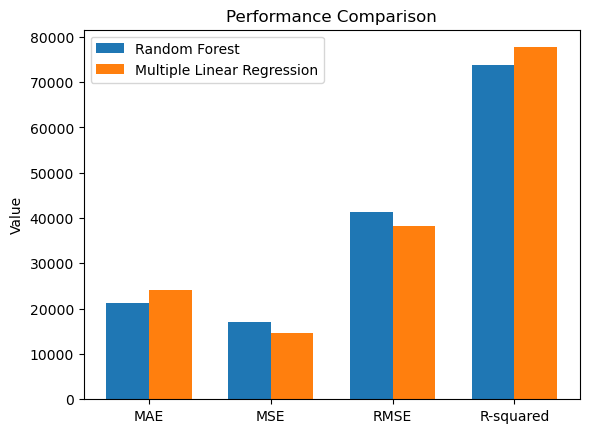

In [18]:
# Create a bar chart to compare the performance of the two models
metrics = ['MAE', 'MSE', 'RMSE', 'R-squared']
values1 = [rf_mae, rf_mse/100000, rf_rmse, rf_r2*100000]
values2 = [lr_mae, lr_mse/100000, lr_rmse, lr_r2*100000]

x = np.arange(len(metrics))
fig, ax = plt.subplots()
bar_width = 0.35

bar1 = ax.bar(x - bar_width/2, values1, bar_width, label='Random Forest')
bar2 = ax.bar(x + bar_width/2, values2, bar_width, label='Multiple Linear Regression')

ax.set_ylabel('Value')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_title('Performance Comparison')
plt.show()

## Determine feature importances and suggest top 10 most important features

In [19]:
#Feature Importance
importance = rf.feature_importances_
for i,v in enumerate(importance):
    print(f'{ohe_train_t.columns[i]} : {v}')

LotArea : 0.03046476910774339
YearBuilt : 0.05194008865097075
YearRemodAdd : 0.0466117964522251
TtlHouseSF : 0.7416196736490359
FullBath : 0.010177858357180212
HalfBath : 0.003704110499904409
BedroomAbvGr : 0.006481679357191347
GarageCars : 0.04330617340834318
MoSold : 0.011935576560790143
YrSold : 0.006382803575997362
LotShape_IR1 : 0.0014051232260587937
LotShape_Reg : 0.0018502045045009246
LotShape_IR2 : 0.0008990050138658992
LotShape_IR3 : 0.00045485363702209183
BldgType_1Fam : 0.0013843609226119162
BldgType_2fmCon : 6.511940735165188e-05
BldgType_Twnhs : 4.541201237704922e-05
BldgType_TwnhsE : 0.0005859662587322583
BldgType_Duplex : 0.00036186975788277484
Neighborhood_Stone Brook : 0.0033225945151227855
Neighborhood_Gilbert : 0.0011056616089021654
Neighborhood_Sawyer : 0.0006204931984024646
Neighborhood_Clear Creek : 0.0006819503150732417
Neighborhood_Crawford : 0.0021198895122487385
Neighborhood_Timberland : 0.000613663629202614
Neighborhood_College Creek : 0.0011058485602779393
N

In [20]:
print("X_train shape:", X_train.shape)
feature_names = ohe_train_t.columns
print("feature_names length:", len(feature_names))

X_train shape: (920, 18)
feature_names length: 62


In [21]:
# Create a dataframe of feature names and their importances
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importance})

# Sort the dataframe by importance in descending order
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 most important features
print(feature_importances.head(10))

         feature  importance
3     TtlHouseSF    0.741620
1      YearBuilt    0.051940
2   YearRemodAdd    0.046612
7     GarageCars    0.043306
0        LotArea    0.030465
8         MoSold    0.011936
4       FullBath    0.010178
6   BedroomAbvGr    0.006482
9         YrSold    0.006383
60  Fireplaces_T    0.004134


Text(0.5, 1.0, 'Top 10 Most Important Features - Random Forest Model')

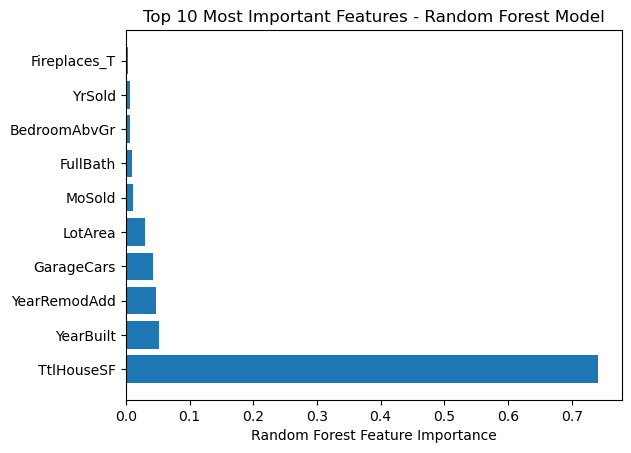

In [22]:
plt.barh(feature_importances['feature'].head(10), feature_importances['importance'].head(10))
plt.xlabel("Random Forest Feature Importance")
plt.title("Top 10 Most Important Features - Random Forest Model")

## Visualize predicted values vs actual values

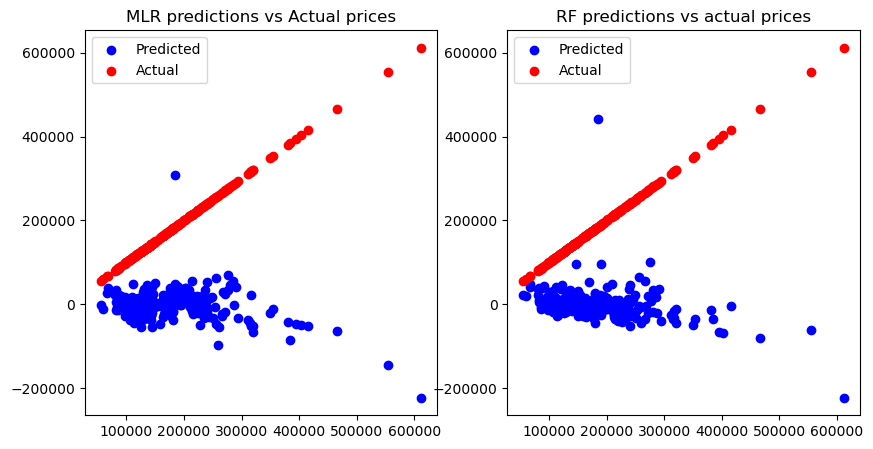

In [23]:
import matplotlib.pyplot as plt

lr_diff = lr_y_pred - y_test
rf_diff = rf_y_pred - y_test

# Plot the differences
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(y_test, lr_diff, c='blue', label='Predicted')
ax[0].scatter(y_test, y_test, c='red', label='Actual')
ax[0].set_title('MLR predictions vs Actual prices')
ax[0].legend()
ax[1].scatter(y_test, rf_diff, c='blue', label='Predicted')
ax[1].scatter(y_test, y_test, c='red', label='Actual')
ax[1].set_title('RF predictions vs actual prices')
ax[1].legend()
plt.show()


In [24]:
lr_result

,LotArea,LotShape,BldgType,YearBuilt,Neighborhood,YearRemodAdd,Heating,TtlHouseSF,FullBath,HalfBath,...,Fireplaces,GarageType,GarageCars,PavedDrive,PoolArea,MoSold,YrSold,actual_sale_price,predicted_value_rf,predicted_value_lr
920,13005,IR1,1Fam,1980,Northwest Ames,1980,GasA,3198,2,1,...,T,Attchd,2,Y,F,8,2009,260000.0,215175.000000,205674.474228
921,6000,Reg,1Fam,1948,Old Town,1950,GasA,1578,1,0,...,F,Detchd,1,Y,F,4,2008,115000.0,89598.000000,80090.725064
922,10402,IR1,1Fam,2009,College Creek,2009,GasA,2452,2,0,...,F,Attchd,3,Y,F,5,2010,198900.0,188793.340000,210510.899034
923,7024,Reg,1Fam,2005,Edwards,2005,GasA,2264,1,1,...,F,Attchd,2,Y,F,6,2008,176000.0,155954.986667,173380.906871
924,10159,IR1,1Fam,2009,Northridge Heights,2010,GasA,3870,2,1,...,T,Attchd,3,Y,F,4,2010,395192.0,329338.240000,347357.942857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,8405,Reg,1Fam,1945,Edwards,1950,Wall,1529,2,0,...,F,Detchd,1,N,F,4,2009,98000.0,84532.220000,69962.020227
1147,5700,Reg,1Fam,1926,Old Town,1950,GasA,1683,1,0,...,T,Detchd,1,Y,F,8,2008,116900.0,97350.160000,90501.102898
1148,8400,Reg,Duplex,1977,Sawyer West,1977,GasA,2020,2,0,...,T,Detchd,2,Y,F,10,2007,144000.0,135128.560000,131652.379809
1149,9591,Reg,1Fam,2004,Northridge Heights,2005,GasA,3616,2,1,...,T,BuiltIn,3,Y,F,10,2007,317000.0,301392.300000,339772.152435


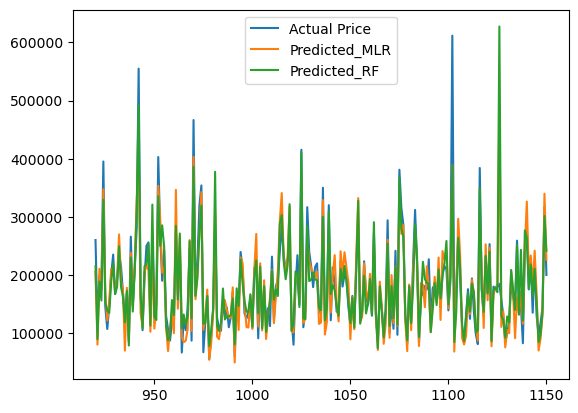

In [25]:
# Plot the columns
plt.plot(lr_result['actual_sale_price'], label='Actual Price')
plt.plot(lr_result['predicted_value_lr'], label='Predicted_MLR')
plt.plot(lr_result['predicted_value_rf'], label='Predicted_RF')
plt.legend()
plt.show()

## Save the model

In [26]:
# Save the model
joblib.dump(rf, 'RandomForest.pkl')
joblib.dump(reg, 'MulitpleLinearRegression.pkl')

['MulitpleLinearRegression.pkl']